In [2]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data.

In [7]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348

In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1149.018886,1471.558199,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1180.581085,1496.518834,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1441.762339,1753.448692,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1436.524882,1742.554285,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1680.745827,1999.493065,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.687845,5081.612816,5403.518122,5189.749479,5213.350360,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4912.116197,5240.486149,5205.336634,5230.185037,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5020.108072,5344.628559,5220.180888,5246.542659,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5164.384449,5489.070742,5234.638199,5263.852213,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749
347,2020-12-01,5263.906554,6156.933696,6488.031970,5249.104062,5280.714946,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,0.0,0.0,0.0,6334.440008


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.559148,4463.584840,4789.456864
337,2020-02-01,4679.231311,4510.444571,4831.540497
338,2020-03-01,4942.493052,4783.970949,5115.130673
339,2020-04-01,4941.412350,4784.842448,5116.819552
340,2020-05-01,5198.212046,5043.129232,5360.094678
341,2020-06-01,5178.840512,5023.237867,5340.714580
342,2020-07-01,5311.075537,5155.310089,5477.961966
343,2020-08-01,5240.612763,5081.612816,5403.518122
344,2020-09-01,5083.379410,4912.116197,5240.486149
345,2020-10-01,5188.922115,5020.108072,5344.628559


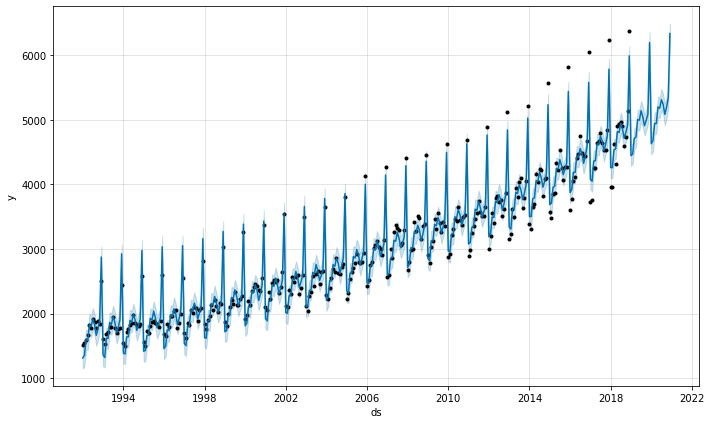

In [17]:
m.plot(forecast);

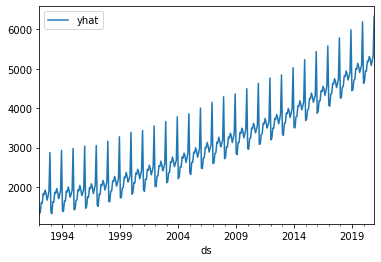

In [23]:
forecast.plot(x='ds',y='yhat')

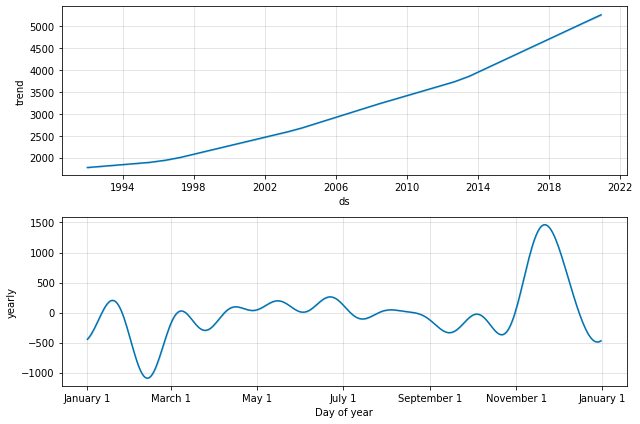

In [24]:
m.plot_components(forecast);

## **Evaluation**

In [3]:
df = pd.read_csv('Miles_Traveled.csv')

In [4]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [5]:
df.columns = ['ds','y']

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


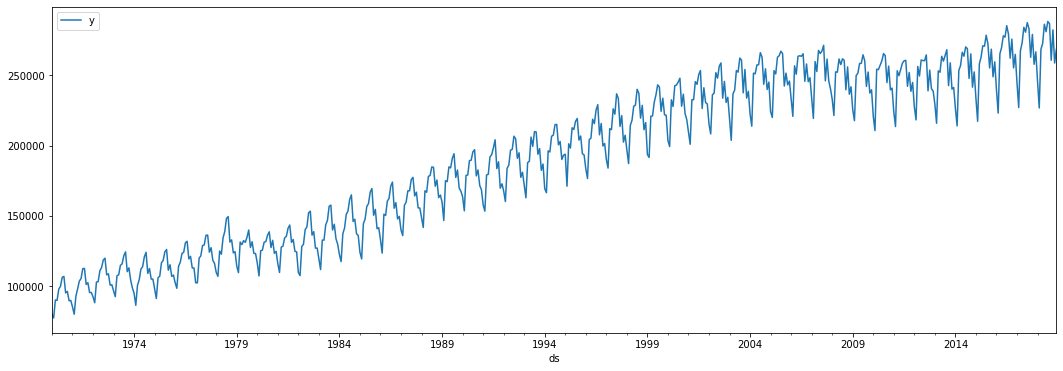

In [8]:
df.plot(x='ds',y='y',figsize=(18,6))

In [9]:
len(df)

588

In [10]:
len(df) - 12

576

In [11]:
train = df.iloc[:576]
test = df.iloc[576:]

In [12]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,274125.939177,285572.444990,263386.208584,263491.591586,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256182.672877,267420.111115,263495.929950,263661.925642,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263264.691794,274513.454673,263583.947554,263819.730072,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,250101.636471,261330.596947,263691.343774,263985.841490,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,251550.302923,262909.970282,263792.360330,264158.475111,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


In [14]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


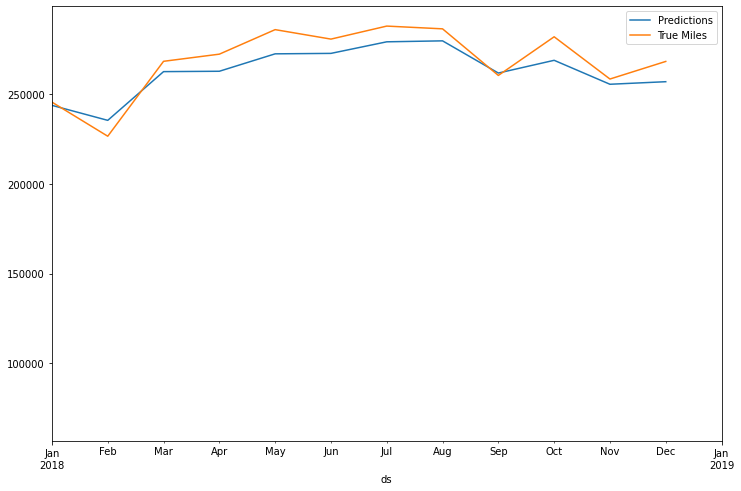

In [15]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [16]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [17]:
predictions = forecast.iloc[-12:]['yhat']

In [18]:
predictions

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [19]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [20]:
rmse(predictions,test['y'])

8588.50451989775

In [21]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64